# Cross-validation of DAVE and Orcaflex static results

Create a new DAVE scene based on the "snake15.dave" example file and solve statics

In [1]:
from DAVE import *
s = Scene('Snake15.dave')
s.solve_statics()

Equilibrium-core version = 1.05
default resource folders:
C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources
C:\Users\beneden\DAVE_models
C:\data\Dave\Public\DAVE-notebooks\validation\orcaflex
Blender found at: C:\Program Files\Blender Foundation\Blender 2.90\blender.exe
Loading C:\Users\beneden\Miniconda3\envs\DAVE\lib\site-packages\DAVE\resources\Snake15.dave
Solved to 5.941829030575718e-06.


True

Show the model

embedWindow(verbose=True): could not load k3d module, try:
> pip install k3d      # and if necessary:
> conda install nodejs


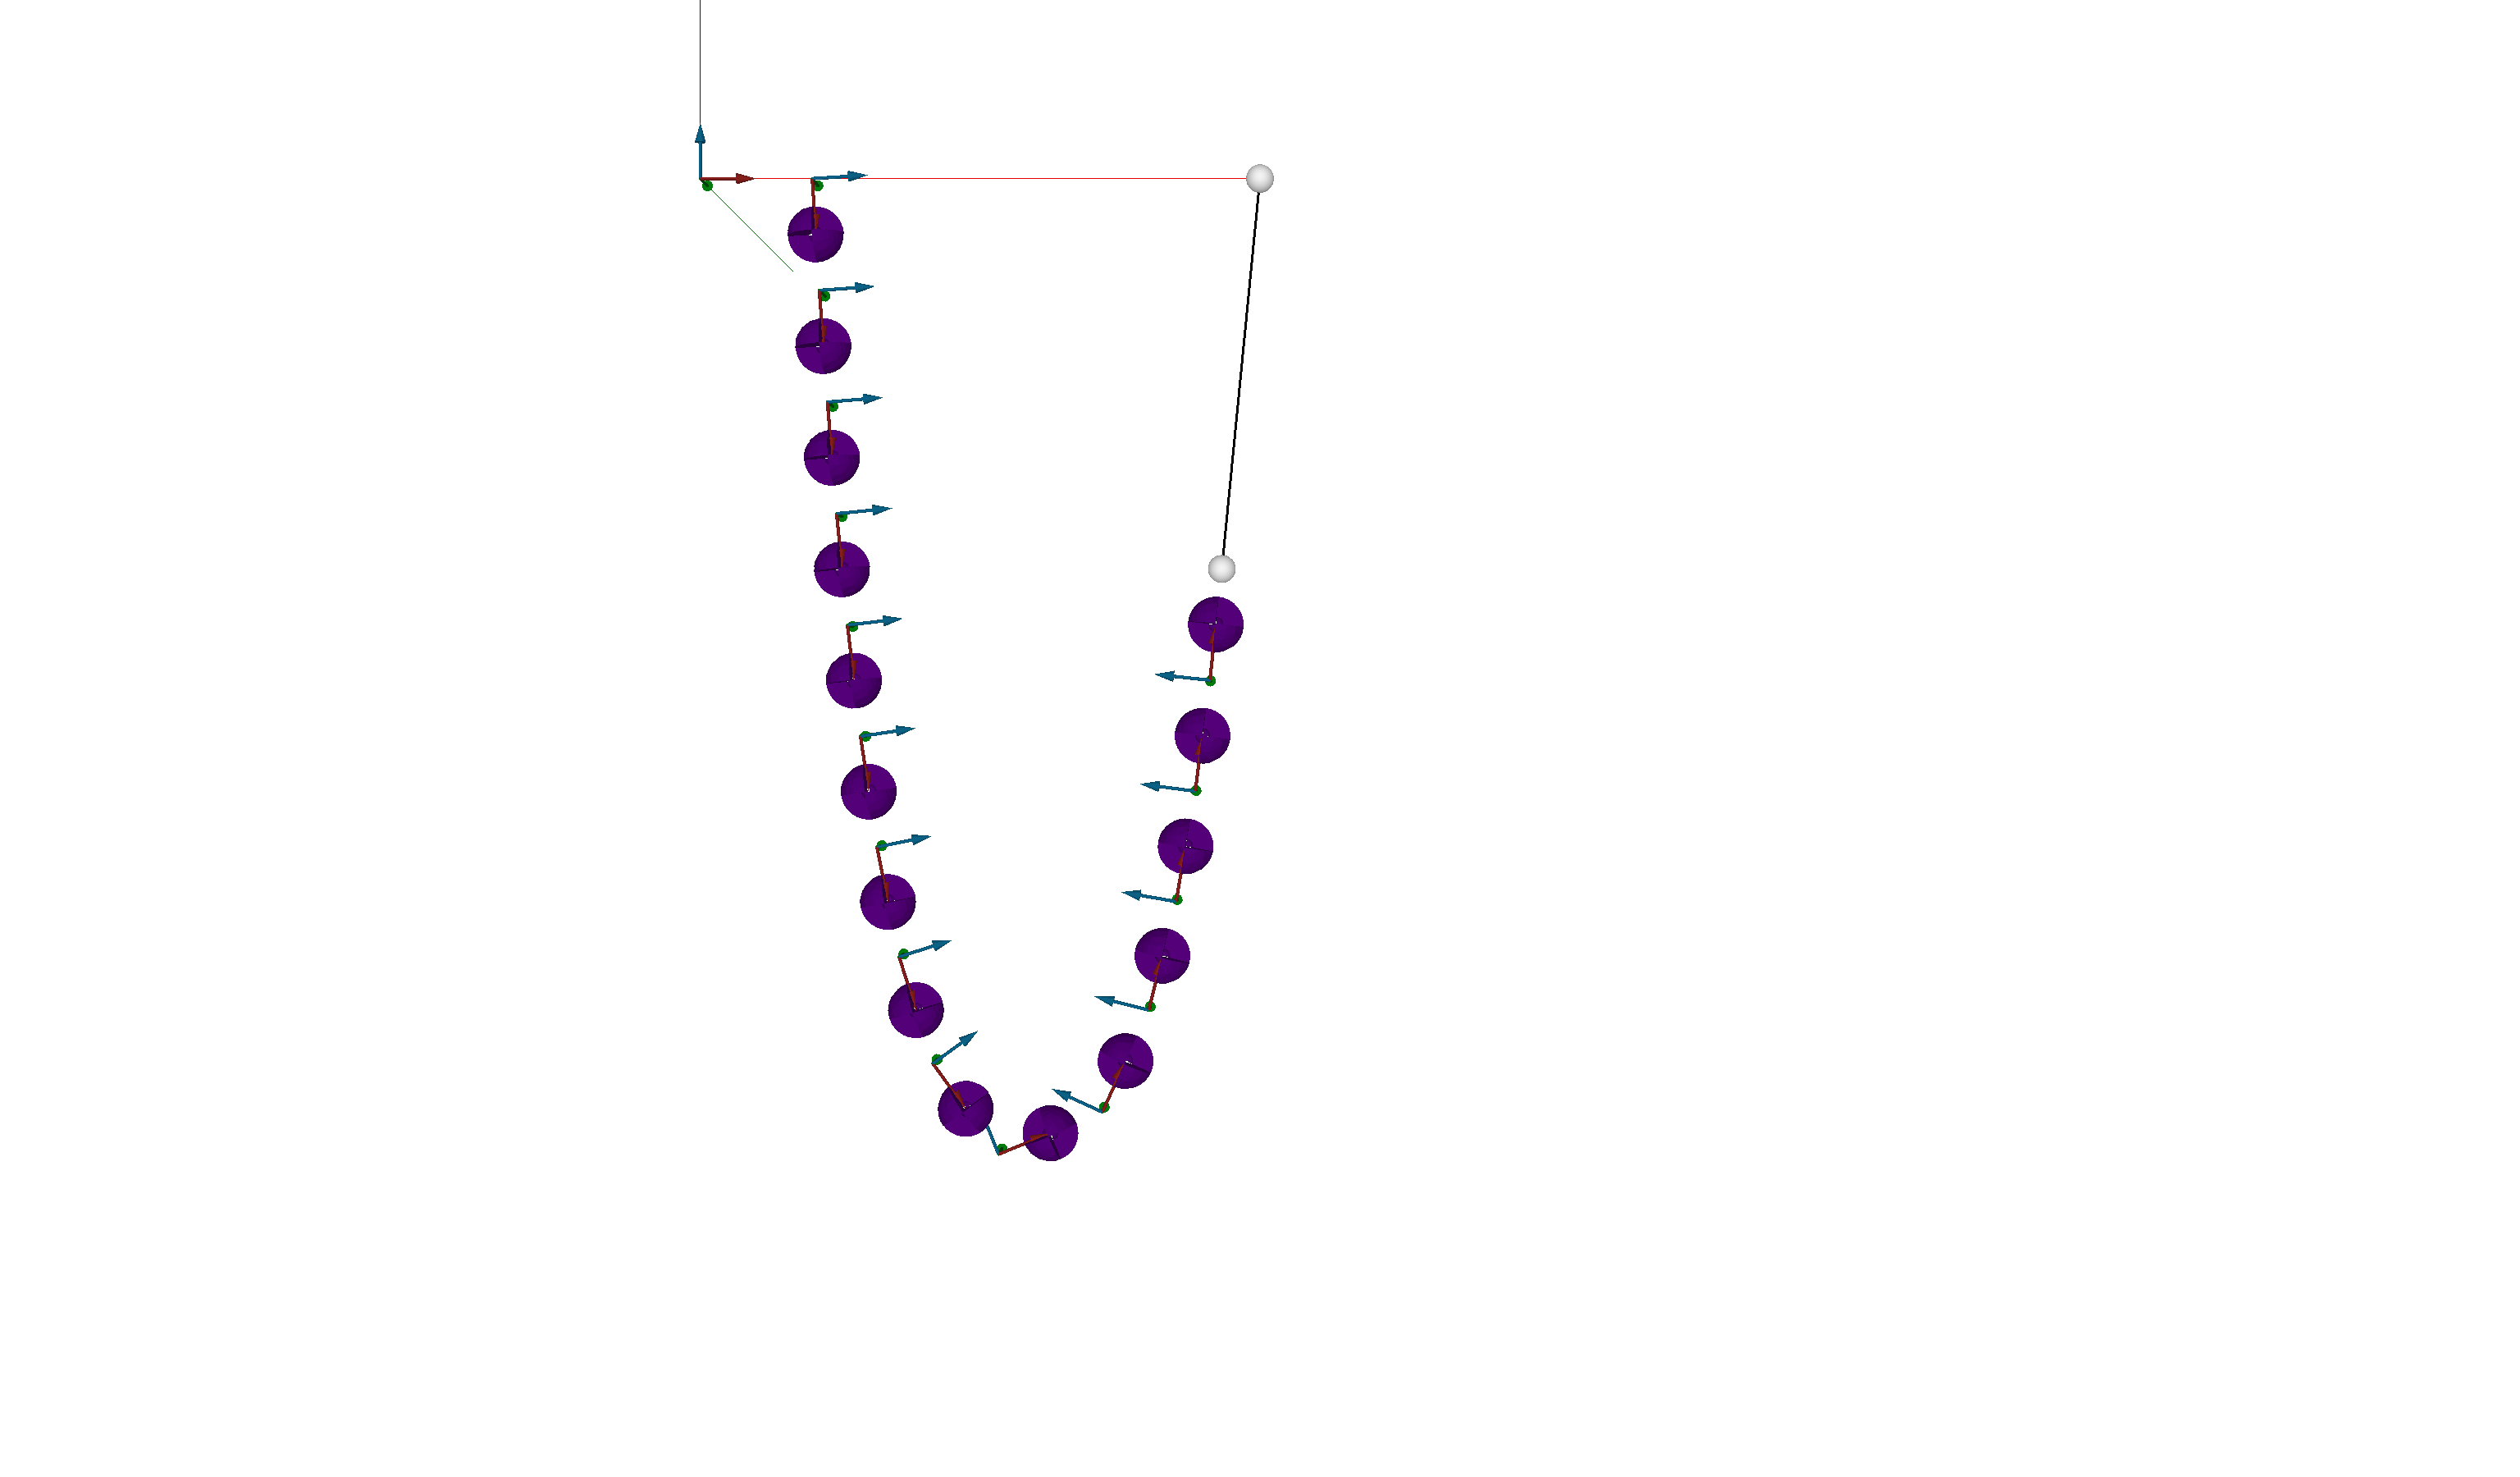

In [2]:
from DAVE.jupyter import *
show(s, sea=False, camera_pos = (10,-50,-10), lookat = (10,0,-10))

In [3]:
# view(s)  # for interactive view

The model consists of 15 bodies that are all connected to the previous one using a hinge. Each body has a mass. 

These is a first body (base0) which is connected to the world.
The last body of the chain is connected to a cable. Like so:

In [4]:
s.print_node_tree()

base0 [Axis]
 |-> base1 [RigidBody]
 |    |-> base2 [RigidBody]
 |    |    |-> base3 [RigidBody]
 |    |    |    |-> base4 [RigidBody]
 |    |    |    |    |-> base5 [RigidBody]
 |    |    |    |    |    |-> base6 [RigidBody]
 |    |    |    |    |    |    |-> base7 [RigidBody]
 |    |    |    |    |    |    |    |-> base8 [RigidBody]
 |    |    |    |    |    |    |    |    |-> base9 [RigidBody]
 |    |    |    |    |    |    |    |    |    |-> base10 [RigidBody]
 |    |    |    |    |    |    |    |    |    |    |-> base11 [RigidBody]
 |    |    |    |    |    |    |    |    |    |    |    |-> base12 [RigidBody]
 |    |    |    |    |    |    |    |    |    |    |    |    |-> base13 [RigidBody]
 |    |    |    |    |    |    |    |    |    |    |    |    |    |-> base14 [RigidBody]
 |    |    |    |    |    |    |    |    |    |    |    |    |    |    |-> base15 [RigidBody]
 |    |    |    |    |    |    |    |    |    |    |    |    |    |    |    |-> Poi [Point]
Poi_1 [Point]
Cable

## Orcaflex

This model can be exported to orcaflex.

- The bodies will be exported as 6D buoys
- The hinges (reduced degrees of freedom in DAVE) are exported as constraints
- The cable is exported as a winch

This is all exported to a .yml file.

If you have orcaflex on this computer then DAVE will use the OrcFxAPI to open the model, solve statics and summarize the static results. The static results are returned as a dict.

This only runs if you have orcaflex and an available license.


In [5]:
from DAVE.io.orcaflex import *

# If the orcaflex/python configuration on your pc is not properly configured then you may need to manually add the path to the orcaflex api. This is done here
import sys
sys.path.append(r'C:\Program Files (x86)\Orcina\OrcaFlex\10.2\OrcFxAPI\Python')

try:
    ofx_results = run_statics_collect(s, filename = r'c:\data\snake15.yml')
except Exception as E:
    print(E)

Written C:\Users\beneden\AppData\Local\Temp\ofx_dave_runfile.py to run c:\data\snake.yml and save resuts as c:\data\snake_sum.yml
No module named 'OrcFxAPI'


Now it is possible that you, like me, do not have orcaflex. In that case the previous cell resulted in an error like "No module named 'OrcFxAPI' "

## What if you do not have Orcaflex

- You can still download the orcaflex demo to open and view the .yml model file


![screenshot](screenshot_snake15.png)

    - All the bodies have been exported as 6D buoys
    - The partially free connections to their parents have been exported as contraints
    - The cable has been exported as winch

- You can give the model to somebody who has orcaflex and ask nicely if they can run it for you using the created .py file
- You can then load the model_sum.yml file directly.


In [10]:
ofx_results = r'snake15_sum.yml' # this step can be skipped if the previous cell ran without errors

There is a small utility fuction to compare the orcaflex static results to the results in the DAVE model. ofx_results may be a results dictionary or a modelname_sum.yml file

In [11]:
comparison = compare_statics(s, ofx_results)

To nicely display the result dictionary we convert it to a pandas dataframe. Just a quick trick to make a table.

In [12]:
import pandas as pd
pd.DataFrame.from_dict(comparison)

,Name,Prop,Orcaflex,DAVE
0,base0,"global position [m,m,m]","(0.0, 0.0, 0.0)","(0.0, 0.0, 0.0)"
1,base0,"global rotation vec [deg,deg,deg]","[0.0, 0.0, 0.0]","(0.0, 0.0, 0.0)"
2,base1,"global position [m,m,m]","(2.0, 0.0, 0.0)","(2.0, 0.0, 0.0)"
3,base1,"global rotation vec [deg,deg,deg]","[0.0, 86.3458165958974, 0.0]","(0.0, 86.34581688567579, 0.0)"
4,base2,"global position [m,m,m]","(2.127468608064057, 0.0, -1.9959338050041169)","(2.1274685979694477, 0.0, -1.9959338056488003)"
5,base2,"global rotation vec [deg,deg,deg]","[0.0, 85.87717852547878, 0.0]","(0.0, 85.87717896511793, 0.0)"
6,base3,"global position [m,m,m]","(2.2712580663835693, 0.0, -3.9907582563471875)","(2.271258040982369, 0.0, -3.990758258095189)"
7,base3,"global rotation vec [deg,deg,deg]","[0.0, 85.27096717156601, 0.0]","(0.0, 85.2709676585497, 0.0)"
8,base4,"global position [m,m,m]","(2.4361450916600234, 0.0, -5.983949734578891)","(2.4361450493177528, 0.0, -5.983949737728344)"
9,base4,"global rotation vec [deg,deg,deg]","[0.0, 84.4564042129098, 0.0]","(0.0, 84.45640488996935, 0.0)"


The results are comparable enough to conclude that both programs agree on the equilibrium positions and tensions. They are also different enough to confirm that they are really originate from different programs.

---